<a href="https://colab.research.google.com/github/BaeSang1/Study/blob/main/202304/python230414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기

In [153]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


# Groupby() 함수

In [154]:
grouped = titanic.groupby('Sex')['Age'].agg('mean')
grouped

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [155]:
agg_dict = {'Age' : 'mean','Fare' : "median"}
grouped = titanic.groupby('Sex').agg(agg_dict)
grouped

,Age,Fare
Sex,,
female,27.915709,23.0
male,30.726645,10.5


In [156]:
agg_dict = {'Age' : 'mean','Fare' : ["median",'sum']}
grouped = titanic.groupby('Sex').agg(agg_dict)
grouped

Age   Fare            
             mean median         sum
Sex                                 
female  27.915709   23.0  13966.6628
male    30.726645   10.5  14727.2865

In [157]:
# 멀티 인덱스 문제 발생
agg_dict = {'Age' : 'mean','Fare' : ["median",'sum']}
grouped = titanic.groupby('Sex').agg(agg_dict)
grouped

Age   Fare            
             mean median         sum
Sex                                 
female  27.915709   23.0  13966.6628
male    30.726645   10.5  14727.2865

In [158]:
# 멀티 인덱스 해결1
agg_dict = {'Age' : 'mean','Fare' : ["median",'sum']}
grouped = titanic.groupby('Sex').agg(agg_dict)
print(grouped.columns.values)
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped.reset_index(inplace=True)
grouped

[('Age', 'mean') ('Fare', 'median') ('Fare', 'sum')]


,Sex,Age_mean,Fare_median,Fare_sum
0,female,27.915709,23.0,13966.6628
1,male,30.726645,10.5,14727.2865


In [159]:
# 멀티 인덱스 해결2
agg_dict = {'Age' : 'mean','Fare' : ["median",'sum']}
grouped = titanic.groupby('Sex').agg(agg_dict)
new_cols = []
for col in grouped.columns:
    if isinstance(col,tuple):
        new_col = f'{col[0]}_{col[1]}'
    else:
        new_col = col
    new_cols.append(new_col)
grouped.columns = new_cols
result = grouped.reset_index()
result

,Sex,Age_mean,Fare_median,Fare_sum
0,female,27.915709,23.0,13966.6628
1,male,30.726645,10.5,14727.2865


## 시각화

In [160]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print(mpl.__version__)

3.7.1


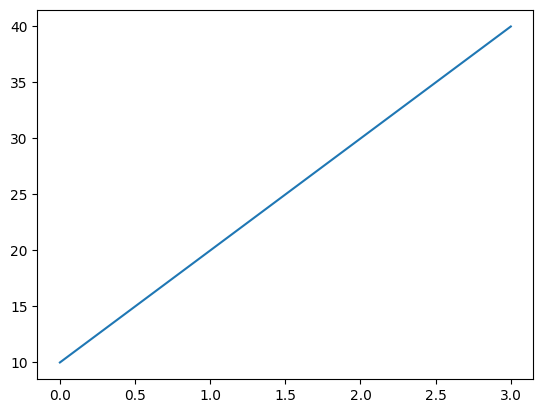

In [161]:
# 교재 56페이지 코드
list_1 = [10,20,30,40]
plt.plot(list_1)
plt.show()

In [162]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]
temp = [1,2,3,4,5,6,7,8,9,10]

- matplotlib 그릴 때, 객체지향으로 그린다!


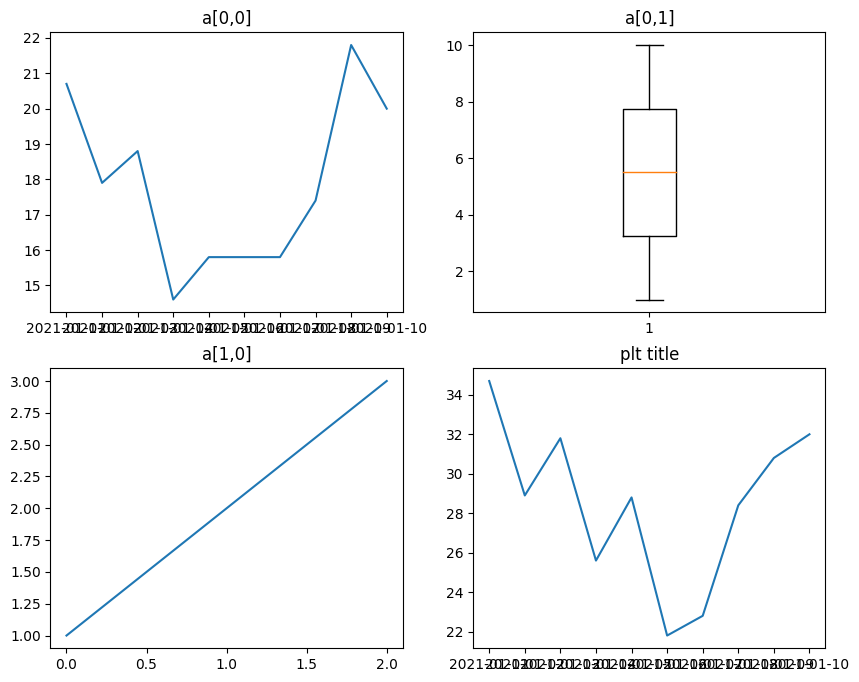

In [163]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize = (10,8))
ax[0,0].plot(dates, min_temperature, label = 'Min Temp')
ax[0,0].set_title('a[0,0]')
ax[0,1].boxplot(temp)
ax[0,1].set_title('a[0,1]')
ax[1,0].plot([1,2,3])
ax[1,0].set_title('a[1,0]')
ax[1,1].plot(dates, max_temperature, label = 'Max Temp')
ax[1,1].set_title('a[1,1]')
plt.title("plt title")

plt.show()

In [164]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 선 그래프(Line)

In [165]:
import yfinance as yf
TSLA = yf.download('TSLA', start='2019-08-01', end = '2023-04-13')
AAPL = yf.download('AAPL', start='2019-08-01', end = '2023-04-13')
ABBV = yf.download('ABBV', start='2019-08-01', end = '2023-04-13')
ARVL = yf.download('ARVL', start='2019-08-01', end = '2023-04-13')

TSLA['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Date
2019-08-01     15.590000
2019-08-02     15.622667
2019-08-05     15.221333
2019-08-06     15.383333
2019-08-07     15.561333
                 ...    
2023-04-05    185.520004
2023-04-06    185.059998
2023-04-10    184.509995
2023-04-11    186.789993
2023-04-12    180.539993
Name: Close, Length: 931, dtype: float64

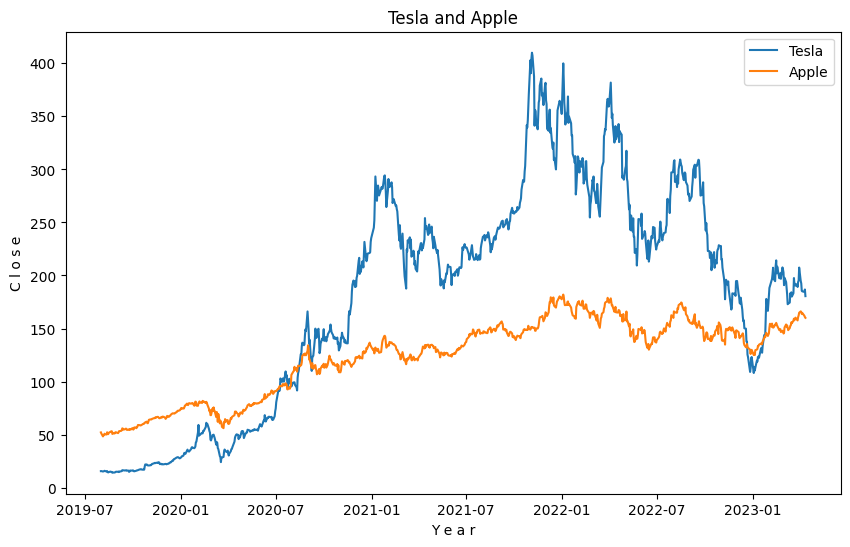

In [166]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(TSLA['Close'], label='Tesla')
ax.plot(AAPL['Close'], label='Apple')
ax.legend()

#title
ax.set_title('Tesla and Apple')
#xlabel
ax.set_xlabel('Y e a r')
#ylabel
ax.set_ylabel('C l o s e')

plt.show()

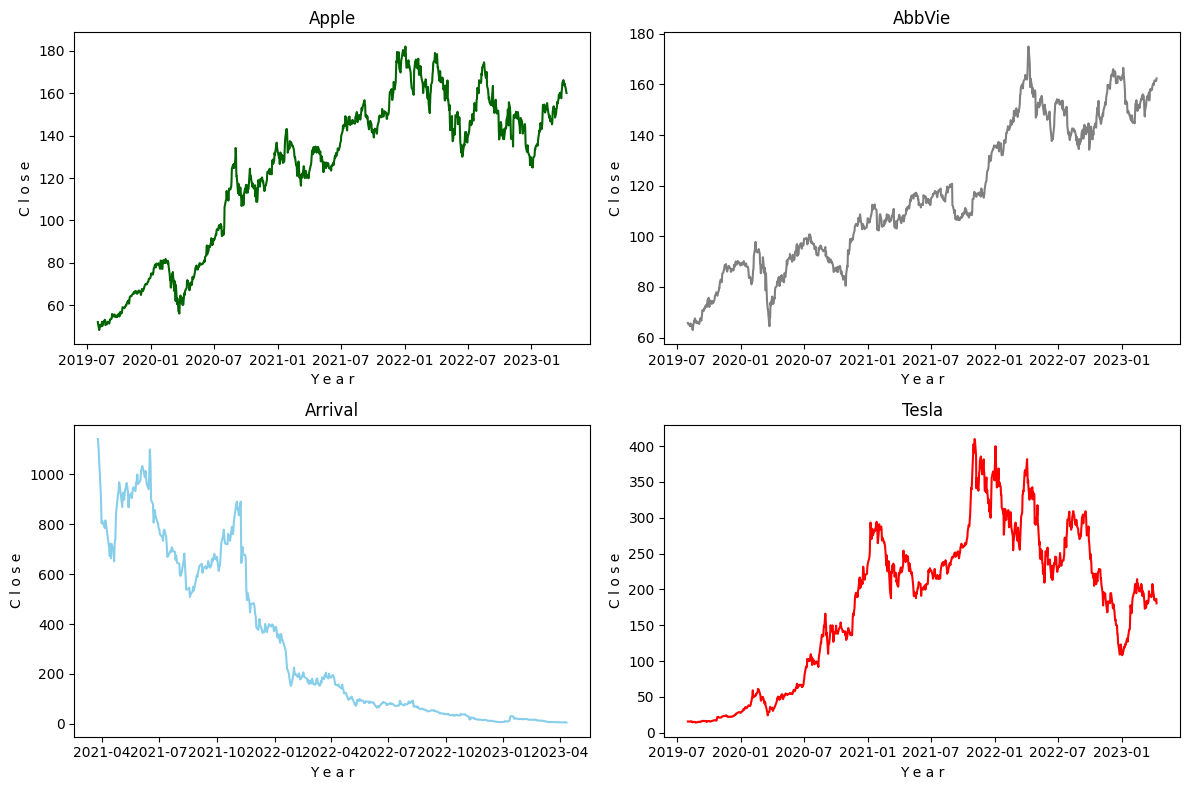

In [167]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,8))

ax[0,0].plot(AAPL['Close'], label='Apple', color='darkgreen')
ax[0,0].set_title('Apple')
ax[0,0].set_xlabel('Y e a r')
ax[0,0].set_ylabel('C l o s e')

ax[0,1].plot(ABBV['Close'], label='AbbVie', color='grey')
ax[0,1].set_title('AbbVie')
ax[0,1].set_xlabel('Y e a r')
ax[0,1].set_ylabel('C l o s e')

ax[1,0].plot(ARVL['Close'], label='Arrival', color='skyblue')
ax[1,0].set_title('Arrival')
ax[1,0].set_xlabel('Y e a r')
ax[1,0].set_ylabel('C l o s e')

ax[1,1].plot(TSLA['Close'], label='Tesla', color='red')
ax[1,1].set_title('Tesla')
ax[1,1].set_xlabel('Y e a r')
ax[1,1].set_ylabel('C l o s e')

plt.tight_layout()     # layout의 간격을 맞춰준다(겹치지 않게)
plt.show()

## Seaborn 라이브러리


In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


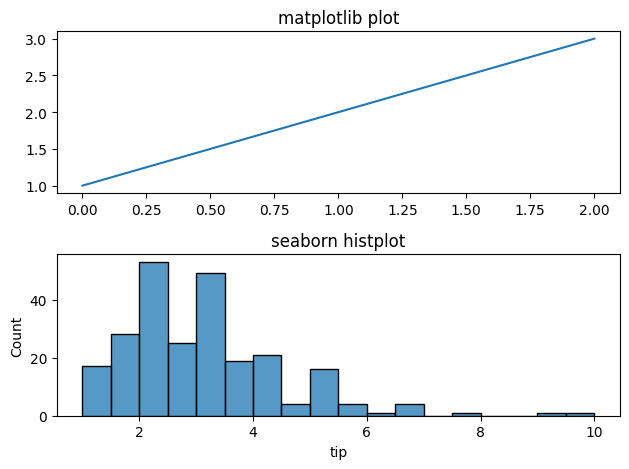

In [169]:
fig,ax = plt.subplots(nrows=2,ncols=1)
ax[0].plot([1,2,3])
ax[0].set_title('matplotlib plot')

sns.histplot(x='tip',data=tips, ax=ax[1])
ax[1].set_title("seaborn histplot")

plt.tight_layout()
plt.show()

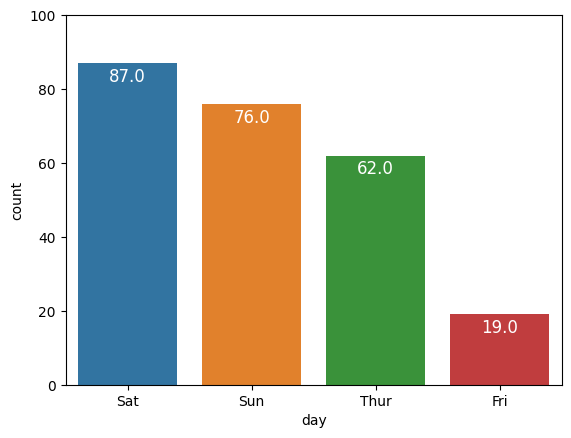

In [170]:
# 막대 그래프
fig,ax =  plt.subplots()
ax = sns.countplot(x='day',data=tips, order = tips['day'].value_counts().index)   #order = 리스트 형식으로 들어가며 value_counts().index 는 내림차순 정렬
# print("그래프 타입 : ",type(ax))

for p in ax.patches:
    # print(p, type(p))   # patches의 Rectangle 함수의 내장 메소드를 사용하여 데이터 추출
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2,
            y = height-5, 
            s=height, 
            ha='center',
            color = 'white',
            size = 12)
    ax.set_ylim(0,100)
    
plt.show()